In [74]:
#input files
import os 
folder = '/Users/Zack/Desktop/test/'
files = os.listdir(folder)
file = 'aerialImage_(19, 37.06686, 26.88734, 37.06691, 26.88728).jpeg' #blue color
#file = 'aerialImage_(19, 37.06131, 21.57463, 37.06135, 21.57457).jpeg' #light color

In [75]:
#convert rgb to hex
def rgb_to_hex(rgb):
    rgb = (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return '%02x%02x%02x' % rgb

'bac7bc'

In [76]:
#https://www.timpoulsen.com/2018/finding-the-dominant-colors-of-an-image.html
# import cv2
# import numpy as np

# #function to generate mean color of an image
# def mean_rgb(folder, file):
#     img = cv2.imread(folder + file)
#     height, width, _ = np.shape(img)
#     avg_color_per_row = np.average(img, axis=0)
#     avg_colors = np.average(avg_color_per_row, axis=0)
#     int_averages = np.array(avg_colors, dtype=np.uint8)
#     return int_averages.tolist()

# mean_rgb(folder, file)

In [77]:
#https://www.dataquest.io/blog/tutorial-colors-image-clustering-python/
import scipy
import pandas as pd 
from matplotlib import image as img
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans
    
def dom_rgb(folder, file):
    image = img.imread(folder + file)

#     #plot image
#     print(image.shape)
#     plt.imshow(image)
#     plt.show()

    #generate data frame
    r, g, b = [], [], []
    for line in image:
        for pixel in line:
            temp_r, temp_g, temp_b = pixel
            r.append(temp_r)
            g.append(temp_g)
            b.append(temp_b)
            
    #plot
#     from mpl_toolkits.mplot3d import Axes3D
#     fig = plt.figure()
#     ax = Axes3D(fig)
#     ax.scatter(r, g, b)
#     plt.show()

    df = pd.DataFrame({'red': r,'blue': b,'green': g})
    df['scaled_red'] = whiten(df['red'])
    df['scaled_blue'] = whiten(df['blue'])
    df['scaled_green'] = whiten(df['green'])

    cluster_center, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 1)

    std = df[['red', 'green', 'blue']].std()
    r=cluster_center[0][0] * std[0]
    g=cluster_center[0][1] * std[1]
    b=cluster_center[0][2] * std[2]
    rgb = [round(r), round(g), round(b)]
    return rgb

In [93]:
#generate mean color for all images in folder
rgb_values, hex_values = [], []
for i in (files):
    #rgb = mean_rgb(folder, i)
    rgb = dom_rgb(folder, i)
    hex_color = rgb_to_hex(rgb)
    rgb_values.append(rgb)
    hex_values.append(hex_color)

color_list = pd.DataFrame({'image': files, 'rgb' : rgb_values, 'hex' : hex_values}).sort_values(by='hex')
color_list

,image,rgb,hex
31,"aerialImage_(19, 37.03664, 26.92152, 37.03669,...","[10.0, 23.0, 55.0]",0a1737
26,"aerialImage_(19, 37.0248, 26.94448, 37.02485, ...","[11.0, 22.0, 52.0]",0b1634
42,"aerialImage_(19, 37.05802, 26.90842, 37.05806,...","[15.0, 42.0, 63.0]",0f2a3f
10,"aerialImage_(19, 36.99971, 26.42534, 36.99976,...","[16.0, 24.0, 46.0]",10182e
27,"aerialImage_(19, 37.02491, 26.95829, 37.02496,...","[17.0, 41.0, 63.0]",11293f
...,...,...,...
24,"aerialImage_(19, 37.02437, 25.36231, 37.02442,...","[139.0, 144.0, 135.0]",8b9087
33,"aerialImage_(19, 37.03804, 24.65177, 37.03809,...","[167.0, 171.0, 164.0]",a7aba4
71,"aerialImage_(19, 37.11067, 24.50437, 37.11071,...","[186.0, 199.0, 188.0]",bac7bc
39,"aerialImage_(19, 37.04547, 24.63296, 37.04551,...","[190.0, 193.0, 187.0]",bec1bb


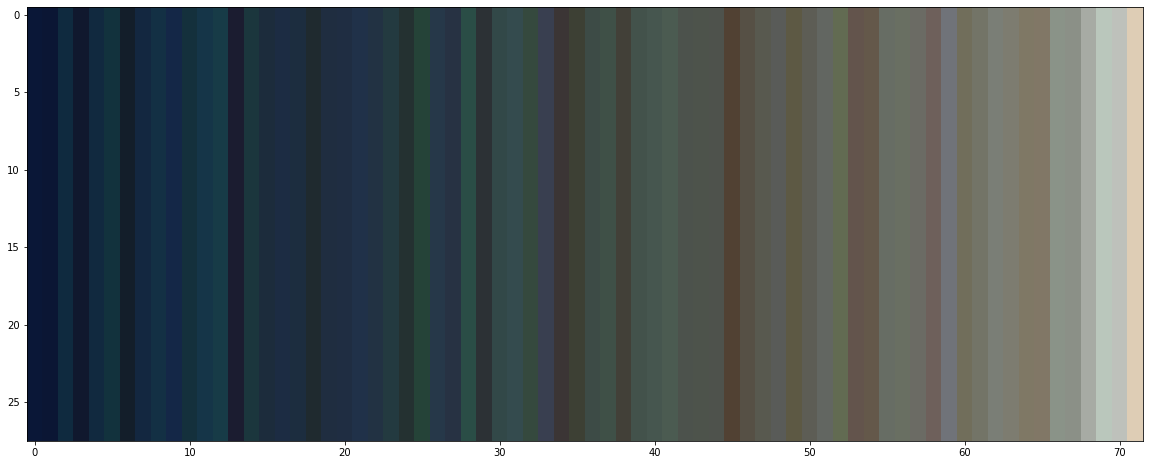

In [118]:
from PIL import Image
barColors = color_list['rgb'].tolist()
barColors = (np.array(barColors)).astype(np.uint8)

#creating bar image
cols = len(barColors)
rows = max([1,int(cols/2.5)])

# Create color Array
barFullData = np.tile(barColors, (rows,1)).reshape(rows, cols, 3)

# Create Image from Array
barImg = Image.fromarray(barFullData, 'RGB')

plt.figure(figsize=(20,10))
plt.imshow(barImg)

72

In [90]:
#color_list.to_csv ('/Users/Zack/Desktop/color_list.csv', index = None, header=True)